# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 observations

#### Question 2. Create a summary table

In [4]:
df_raw.describe()

C:\Program Files\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: because GRE is measured from 220 to 800 and gpa from 2.26 to 4

#### Question 4. Drop data points with missing data


In [6]:
df = df_raw.dropna()
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: dropna by default drops rows with any na values. describe() confirms that all na's have been dropped

#### Question 6. Create box plots for GRE and GPA

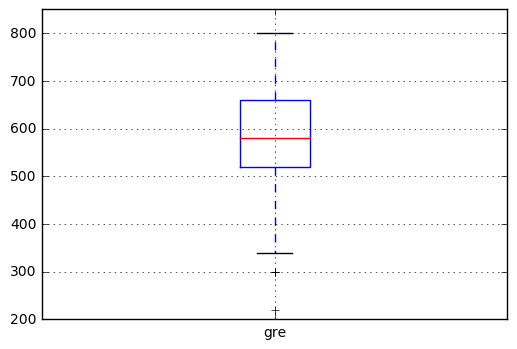

In [13]:
#boxplot 
ax = df[['gre']].boxplot(return_type='axes');
ax.set_ylim(200,850);

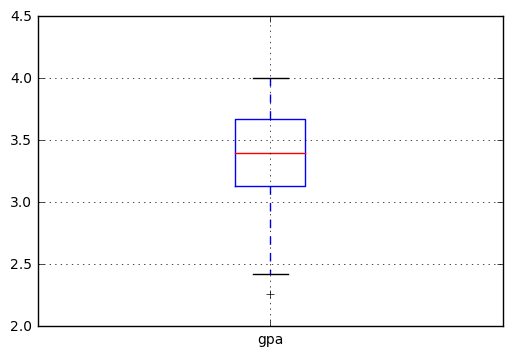

In [14]:
#boxplot 2 
ax = df[['gpa']].boxplot(return_type='axes');
ax.set_ylim(2,4.5);

#### Question 7. What do this plots show?

Answer: the box plots show the median=the red line, the body of the box is interquartile range=Q1 to Q3. Whiskers show the 95% of the distribution. Outliers are plotted as dots. 

#### Question 8. Describe each distribution 

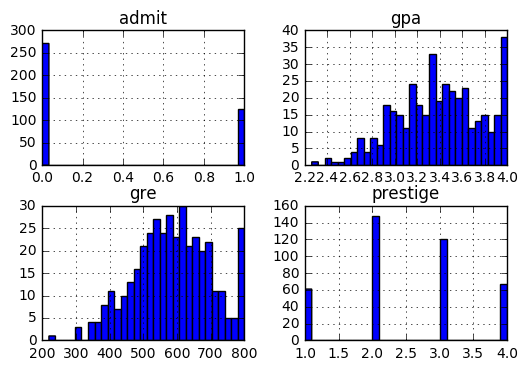

In [29]:
# plot the distribution of each variable 
df.hist(bins=30);

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [26]:
from scipy import stats
print stats.normaltest(df['gre'])
print stats.normaltest(df['gpa'])

NormaltestResult(statistic=3.8179829306094248, pvalue=0.14822980613776679)
NormaltestResult(statistic=13.07987556091647, pvalue=0.0014445783772290991)


In [27]:
print stats.shapiro(df['gre'])
print stats.shapiro(df['gpa'])

(0.9857397079467773, 0.0006041502929292619)
(0.9772263765335083, 6.794117325625848e-06)


Answer: admit is a binary variable and presige is an ordinal variable, so they are clearly not normally distributed. Nonparametric tests strongly reject normality for gre and gpa. Which is clear from the histogram due to spikes at 4.0 for gpa and 800 for gre.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: The question is unclear. But I guess you mean how to transform gpa an gre to make it less left-skewed. This can be achieved by moving up the ladder of powers - squaring the values. The distribution is still strongly non-normal due to spikes at 4.0 and 800, of course.

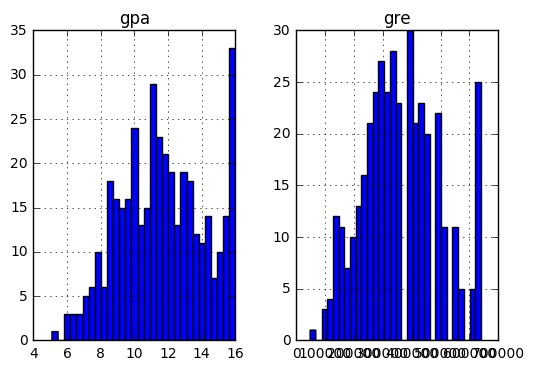

In [38]:
df_2=np.power(df[['gre','gpa']], 2)
df_2.hist(bins=30);

#### Question 11. Which of our variables are potentially colinear? 

In [28]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: gre and gpa have the highest correlation, so they are the prime candidates for collinearity, but the correlation of 0.38 is not that high, so it's unlikely to be a problem.
gpa and prestige have the lowest correlation.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: We will explore how the admission rate depends on the prestige of the undergraduate school.

#### Question 14. What is your hypothesis? 

Answer: The hypothesis is that higher prestige (prestige=1 being the highest) leads to higher admission rates.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [41]:
df_clean = df_raw.dropna(how='all')
df_clean.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [42]:
df_clean = df_raw[df_raw['gre'].notnull() & df_raw['gpa'].notnull()]
df_clean.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### 2. Bonus: Log transform the skewed data

Log transforming left-skewed data makes it even more left-skewed.

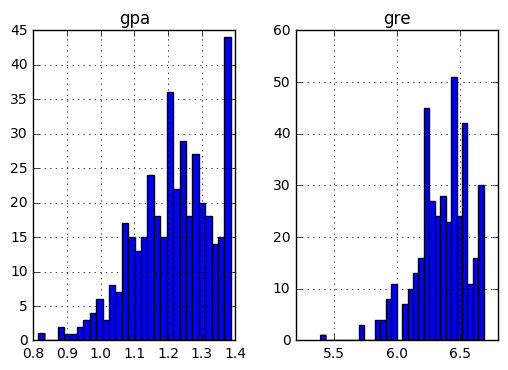

In [44]:
df_log=np.log(df[['gre','gpa']])
df_log.hist(bins=30);

#### 3. Advanced: Impute missing data

In [57]:
df_imp = df.copy()
df_imp.median()

admit         0.000
gre         580.000
gpa           3.395
prestige      2.000
dtype: float64

In [58]:
print df_imp[df_raw['gre'].isnull() | df_raw['gpa'].isnull()]
idx=df_imp[df_raw['gre'].isnull() | df_raw['gpa'].isnull()].index

     admit    gre   gpa  prestige
187      0    NaN   NaN       2.0
212      0    NaN  2.87       2.0
236      1  660.0   NaN       NaN


In [59]:
df_imp = df_imp.fillna(value=df_imp.median())

In [60]:
df_imp.count()

admit       400
gre         400
gpa         400
prestige    400
dtype: int64

In [61]:
df_imp.loc[idx]

,admit,gre,gpa,prestige
187,0,580.0,3.395,2.0
212,0,580.0,2.870,2.0
236,1,660.0,3.395,2.0
